In [38]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import plot_temperature as p_info

def chaleur2D_imp(Nx,Ny,cfl):

    plt.close("all")
    
    L = 1
    nu = 1
    T = 0.01

    hx = L / Nx
    hy = L / Ny
    Ncell = Nx * Ny

    Npts_x = Nx - 1
    Npts_y = Ny - 1
    Npts_int = (Nx - 1) * (Ny - 1)

    if cfl == 0:
        Nt = int(input('Nombre de pas de temps : '))
        deltat = T / Nt
        Nt2 = Nt
    else:
        deltat = cfl * (hx ** 2 * hy ** 2) / (nu * (hx ** 2 + hy ** 2))
        Nt = int(np.floor(T / deltat))
        if Nt * deltat != T:
            Nt2 = Nt + 1
        else:
            Nt2 = Nt
            
    #print(f'Le nombre de pas de temps est {Nt2}')

    lambdax = nu * deltat / hx ** 2
    lambday = nu * deltat / hy ** 2

    x = np.linspace(0, L, Nx + 1)
    y = np.linspace(0, L, Ny + 1)
    t = np.linspace(0, T, Nt2 + 1)

    u = np.zeros((Nx + 1, Ny + 1))
    uini = np.zeros((Nx + 1, Ny + 1))
    
    u_map = np.zeros((Npts_int))
    
    def mapping_2D(i, j):
        return (j - 1) * Npts_x + i - 1

    for i in range(1,Npts_x):
        for j in range(1,Npts_y):
            index = mapping_2D(i, j)
            if 0.4 <= x[i] <= 0.6 and 0.4 <= y[j] <= 0.6:
                u[i, j] = 1
                u_map[index] = 1
                
    uini[:] = u[:]
    
    X, Y = np.meshgrid(x, y)

    p_info.plot_info_init(X, Y, uini, np.min(uini), np.max(uini))

    def def_A(lambdax, lambday):
        
        AA = np.zeros((Npts_int, Npts_int))

        for j in range(1, Npts_y + 1):
            for i in range(1, Npts_x + 1):
                k = mapping_2D(i, j)
                AA[k, k] = 1 + 2 * (lambdax + lambday)
                if i > 1:
                    AA[k , k - 1] = -lambdax
                if i < Npts_x:
                    AA[k , k + 1] = -lambdax
                if j > 1:
                    AA[k , k - Npts_x] = -lambday
                if j < Npts_y:
                    AA[k , k + Npts_x] = -lambday

        return AA

    AA = def_A(lambdax, lambday)
    Ai = np.linalg.inv(AA)

    nn = Nt2 + 1
    for n in range(1, Nt + 1):
        u_map[:] = Ai @ u_map[:]

    if T - deltat * Nt > 1e-8:
        deltat = T - deltat * Nt
        lambdax = nu * deltat / hx ** 2
        lambday = nu * deltat / hy ** 2

        AA = def_A(lambdax, lambday)
        Ai = np.linalg.inv(AA)

        u_map[:] = Ai @ u_map[:]

    for i in range(1, Npts_x + 1):
        for j in range(1, Npts_y + 1):
            u[i, j] = u_map[mapping_2D(i, j)]



    minnn = np.min(uini[:, :])
    maxxx = np.max(uini[:, :])
    minu = np.min(u[:, :])
    maxu = np.max(u[:, :])

    minnn = min(minnn, minu)
    maxxx = max(maxxx, maxu)

    p_info.plot_info_fin(X, Y, u[:], minnn, maxxx)



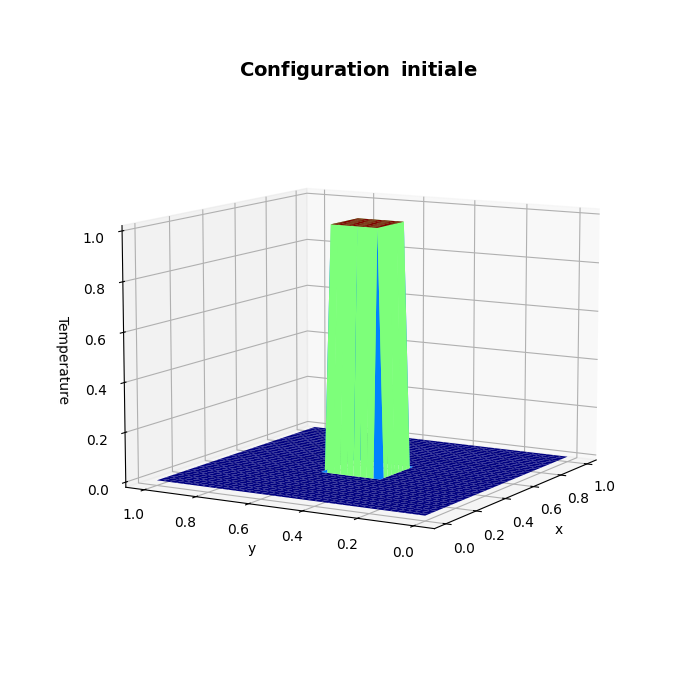

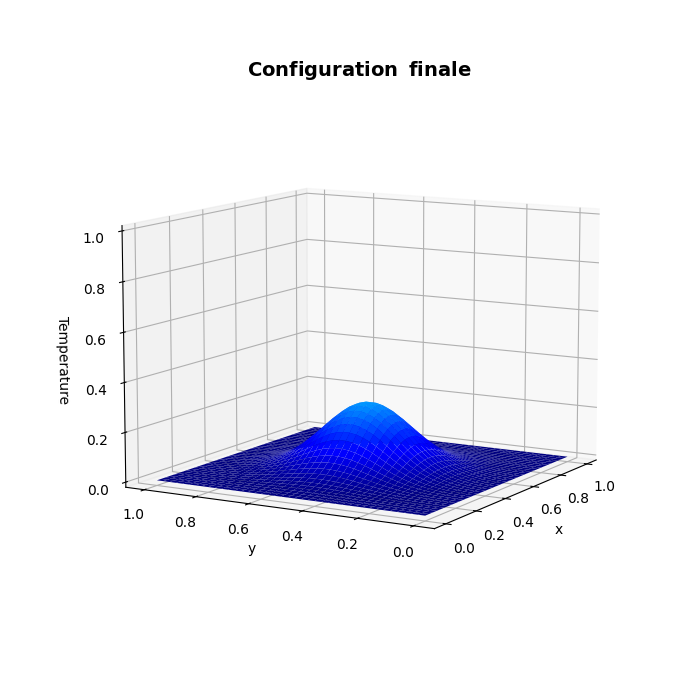

                       La température minimum est de 0.00°C                               
                       La température maximum est de 0.27°C                               
                       La température moyenne est de 0.04°C                               
                       L'écart type des températures est de 0.06°C                        
 


In [41]:
chaleur2D_imp(40,40,0.45)

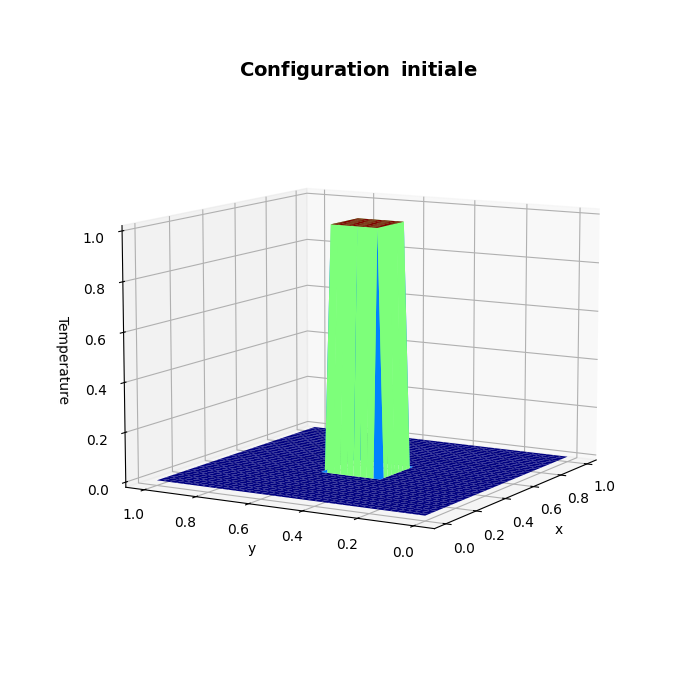

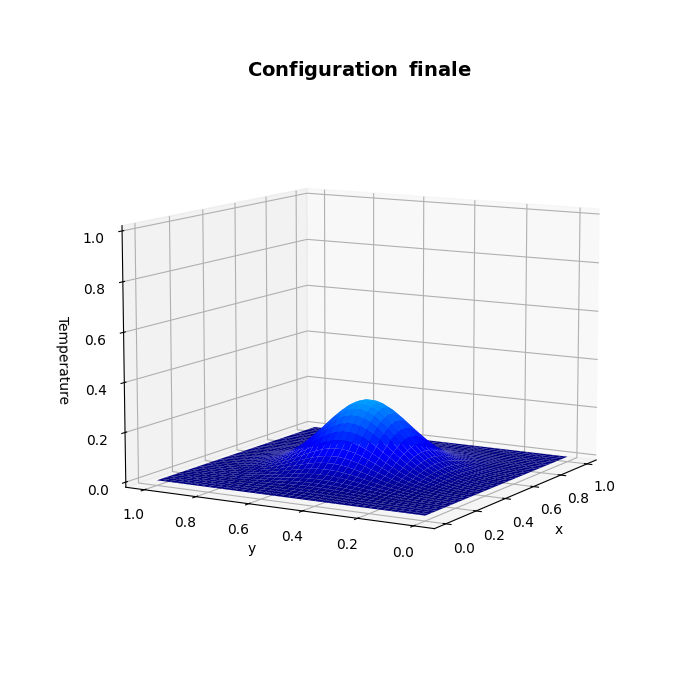

                       La température minimum est de 0.00°C                               
                       La température maximum est de 0.28°C                               
                       La température moyenne est de 0.04°C                               
                       L'écart type des températures est de 0.06°C                        
 


In [42]:
chaleur2D_imp(40,40,2)

Ces résultats corroborent l'analyse de stabilité : le schéma est inconditionnellement stable (schéma implicite en temps)